In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
# change this to the code folder in your drive
home_dir = Path('/content/drive/MyDrive/266 Final Project/Code')
sample_train_data = home_dir / 'data' / 'sample_input_ER.csv'
em_data_path =  home_dir / 'data' / 'emotional-reactions-reddit.csv'
ex_data_path = home_dir / 'data' / 'explorations-reddit.csv'
in_data_path = home_dir / 'data' / 'interpretations-reddit.csv'

In [ ]:
def get_rationale_info(response, rationale):
    rationale_dict = {'rationale_start': [],
                        'rationale_length': [],
                        'rationale_words': [],
                        'rationale_end': []
                      }

    if pd.isnull(rationale):
        rationale_dict['rationale_start'] = pd.NA
        rationale_dict['rationale_length'] = pd.NA
        rationale_dict['rationale_words'] = pd.NA
        rationale_dict['rationale_end'] = pd.NA

    else:
        for sentence in rationale.split('|'):
            if sentence != '':
                rat_start = response.find(sentence)
                rat_len = len(sentence)
                rat_words = len(sentence.split())
                if rat_start == -1:
                    rat_end = -1
                else:
                    rat_end = rat_start + rat_len
                rationale_dict['rationale_start'].append(rat_start)
                rationale_dict['rationale_length'].append(rat_len)
                rationale_dict['rationale_words'].append(rat_words)
                rationale_dict['rationale_end'].append(rat_end)

    return pd.Series(rationale_dict)

def get_df(path_to_csv):
    df = pd.read_csv(path_to_csv, delimiter=',')
    df = df.astype({
        'sp_id': 'string',
        'rp_id': 'string',
        'seeker_post': 'string',
        'response_post': 'string',
        'level': 'int',
        'rationales': 'string'
    })

    df['seeker_length'] = df['seeker_post'].str.len()
    df['response_length'] = df['response_post'].str.len()

    df['seeker_words'] = df['seeker_post'].str.split().map(lambda x: len(x))
    df['response_words'] =  df['response_post'].str.split().map(lambda x: len(x))

    rationale_info = df.apply(lambda row: get_rationale_info(row['response_post'], row['rationales']), axis=1)
    df = pd.concat([df, rationale_info], axis=1)

    return df

In [ ]:
df = get_df(sample_train_data)
df.head(10)

,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",0,<NA>,45,122,9,23,<NA>,<NA>,<NA>,<NA>
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,<NA>,120,392,27,80,<NA>,<NA>,<NA>,<NA>
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,<NA>,102,101,16,19,<NA>,<NA>,<NA>,<NA>
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,0,<NA>,181,288,32,57,<NA>,<NA>,<NA>,<NA>
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,<NA>,582,577,114,108,<NA>,<NA>,<NA>,<NA>
5,5aliuq,d9hmspc,Not arsed with school. Can't study or do homew...,That's why I'm repeating 11th grade. It sucks.,0,<NA>,174,46,34,8,<NA>,<NA>,<NA>,<NA>
6,auo0t4,eh9cb6a,My parents wont allow me to sick medical assis...,Ask your school counselor what resources they ...,0,<NA>,132,133,25,24,<NA>,<NA>,<NA>,<NA>
7,7oi3es,ds9oti2,I called in sick to work today. For the first ...,Is that really so bad? Maybe it was the smart ...,1,Hope you feel better soon|,249,196,52,36,[170],[25],[5],[195]
8,8r6onw,e0oz7y1,"Lost my job, have no reason to live. My career...",Why can't you get a job as a lawyer?,0,<NA>,283,36,52,9,<NA>,<NA>,<NA>,<NA>
9,7gipvi,dqje246,i wanna jump from an elevated place. i wanna k...,I don't want you to jump. I don't want you to ...,1,I don't want you to jump. I don't want you to ...,372,201,72,41,[0],[49],[12],[49]


In [ ]:
df.dtypes

sp_id               string
rp_id               string
seeker_post         string
response_post       string
level                int64
rationales          string
seeker_length        Int64
response_length      Int64
seeker_words         int64
response_words       int64
rationale_start     object
rationale_length    object
rationale_words     object
rationale_end       object
dtype: object

In [ ]:
df[(df['level']==0) & (df['rationales'].notnull())]

,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end


I tried to combine em_df and ex_df into one dataframe, but it became too complicated and I don't think we really need that. We shouldn't have y-values influence other y-values, right? Very rough/messy code in the graveyard in case we want to pursue in the future.

# Emotional Reactions EDA

In [ ]:
em_df = get_df(em_data_path)
em_rows = em_df.shape[0]
print(f'Shape of emotional reactions data: {em_df.shape}')
em_df

NameError: ignored

In [ ]:

em_unique_sp_id = em_df['sp_id'].unique()
em_unique_rp_id = em_df['rp_id'].unique()
em_unique_s_post = em_df['seeker_post'].unique()
em_unique_r_post = em_df['response_post'].unique()

print(f'There are {len(em_unique_sp_id)} unique sp_id and {len(em_unique_s_post)} unique seeker_post.')
print(f'There are {len(em_unique_rp_id)} unique rp_id and {len(em_unique_r_post)} unique response_post.')
print('\n')

em_dup_sp_rp_id = em_df[em_df.duplicated( \
                        subset=['sp_id','rp_id','seeker_post','response_post'], \
                        keep=False)].sort_values('sp_id')

print(f'There are {len(em_dup_sp_rp_id)} duplicate sp_id, rp_id, seeker_post,'
        'and response_post pairings. They seem to comprise of completely\n'
        'duplicated rows, slight differences in rationale punctuation, '
        'phrase differences in rationales, and differing scored empathy levels.')
print('\n')

em_dup_sp_rp_id.head()

# em_dup = em_df[em_df.duplicated(subset=['sp_id','rp_id','seeker_post','response_post'])].sort_values('sp_id')
# print(f'There are {len(em_dup)} true duplicate rows (shown below). We can delete these if desired.')
# em_dup.head()

There are 2979 unique sp_id and 2979 unique seeker_post.
There are 3023 unique rp_id and 3022 unique response_post.


There are 121 duplicate sp_id, rp_id, seeker_post,and response_post pairings. They seem to comprise of completely
duplicated rows, slight differences in rationale punctuation, phrase differences in rationales, and differing scored empathy levels.




,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
2939,46odaq,d06tsfs,Has anyone had an unanticipated nervous breakd...,Saw mine coming a mile away. Suffering from an...,0,<NA>,143,550,23,95,<NA>,<NA>,<NA>,<NA>
1937,46odaq,d06tsfs,Has anyone had an unanticipated nervous breakd...,Saw mine coming a mile away. Suffering from an...,0,<NA>,143,550,23,95,<NA>,<NA>,<NA>,<NA>
2156,4gxyqy,d2n3om0,Fuck everything. Fuck me fuck life fuck the wo...,I know how you feel. Everything went to shit f...,1,I know how you feel.|,65,56,11,12,[0],[20],[5],[20]
324,4gxyqy,d2n3om0,Fuck everything. Fuck me fuck life fuck the wo...,I know how you feel. Everything went to shit f...,1,I know how you feel|,65,56,11,12,[0],[19],[5],[19]
2101,4r8sdq,d4z55rt,"Depressed. I am depressed as hell, what to do?",Depends on what you want to do. Be rid of it? ...,0,<NA>,46,135,9,31,<NA>,<NA>,<NA>,<NA>


In [ ]:
level_0_rationale = em_df[(em_df['level']==0) & (em_df['rationales'].notnull())]
level_1_2_no_rationale = em_df[(em_df['level']!=0) & (em_df['rationales'].isnull())]
print(f'There are {len(level_0_rationale)} rows with a level = 0 and a rationale.')
print(f'There are {len(level_1_2_no_rationale)} rows with a level = 1 or level = 2 and no rationale.')
level_1_2_no_rationale.head()

There are 0 rows with a level = 0 and a rationale.
There are 2 rows with a level = 1 or level = 2 and no rationale.


,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
2028,90u3lm,e2t5g8y,I’m so fucking tired.. Just of everything. I w...,take a nap with you if it meant never wake up....,1,<NA>,126,200,26,41,<NA>,<NA>,<NA>,<NA>
3049,7nxgp1,ds58dos,one question. I'll keep it simple. Can there b...,"That's a pretty profound question, but I think...",1,<NA>,147,1319,30,236,<NA>,<NA>,<NA>,<NA>


We can see that we definitely have unbalanced data. TODO talk to Mark about this? It could be a case to just try to determine rationales instead of predicting empathy level.


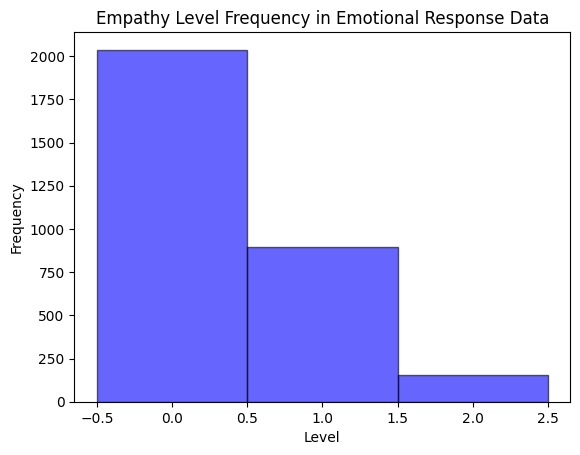

In [ ]:
plt.hist(em_df['level'], color='blue', edgecolor='black', bins=[0,1,2,3], alpha=0.6, align='left', range=[0,2])
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.title('Empathy Level Frequency in Emotional Response Data')
print('We can see that we definitely have unbalanced data. TODO talk to Mark about this? It could be a case to just try to determine rationales instead of predicting empathy level.')

In [ ]:
print('Statistics for seeker and response post lengths')
em_df[['seeker_length', 'response_length']].describe()

Statistics for seeker and response post lengths


,seeker_length,response_length
count,3084.0,3084.0
mean,180.677691,245.066148
std,130.803294,360.551713
min,27.0,17.0
25%,94.0,71.0
50%,154.0,143.0
75%,236.0,295.0
max,1101.0,9191.0


In [ ]:
em_df[['seeker_words', 'response_words']].describe()

,seeker_words,response_words
count,3084.000000,3084.000000
mean,34.706226,46.733787
std,25.214808,68.743159
min,6.000000,5.000000
25%,18.000000,14.000000
50%,30.000000,28.000000
75%,45.000000,56.000000
max,216.000000,1811.000000


In [ ]:
em_df_exploded = em_df.explode(['rationale_start', 'rationale_length', 'rationale_words', 'rationale_end'])
em_df_exploded['rationale_start'] = pd.to_numeric(em_df_exploded['rationale_start'])
em_df_exploded['rationale_length'] = pd.to_numeric(em_df_exploded['rationale_length'])
em_df_exploded['rationale_words'] = pd.to_numeric(em_df_exploded['rationale_words'])
em_df_exploded['rationale_end'] = pd.to_numeric(em_df_exploded['rationale_end'])

unknown_rat_start_loc = len(em_df_exploded[em_df_exploded['rationale_start'] == -1])
print(f'There are {unknown_rat_start_loc} rationles that could not be found, likely due to a typo or special characters.')
print('Statistics for rationales')
em_df_exploded[em_df_exploded['rationale_start'] != -1][['rationale_start', 'rationale_length', 'rationale_words', 'rationale_end']].describe()

There are 13 rationles that could not be found, likely due to a typo or special characters.
Statistics for rationales


,rationale_start,rationale_length,rationale_words,rationale_end
count,1230.000000,1230.000000,1230.000000,1230.000000
mean,142.245528,72.960976,14.421138,215.206504
std,286.784894,73.242856,13.903183,304.624468
min,0.000000,1.000000,1.000000,5.000000
25%,0.000000,28.000000,6.000000,40.250000
50%,0.500000,49.000000,10.000000,105.000000
75%,178.500000,93.000000,18.000000,272.750000
max,4225.000000,994.000000,184.000000,4248.000000


Text(0.5, 0, 'Response Post Length')

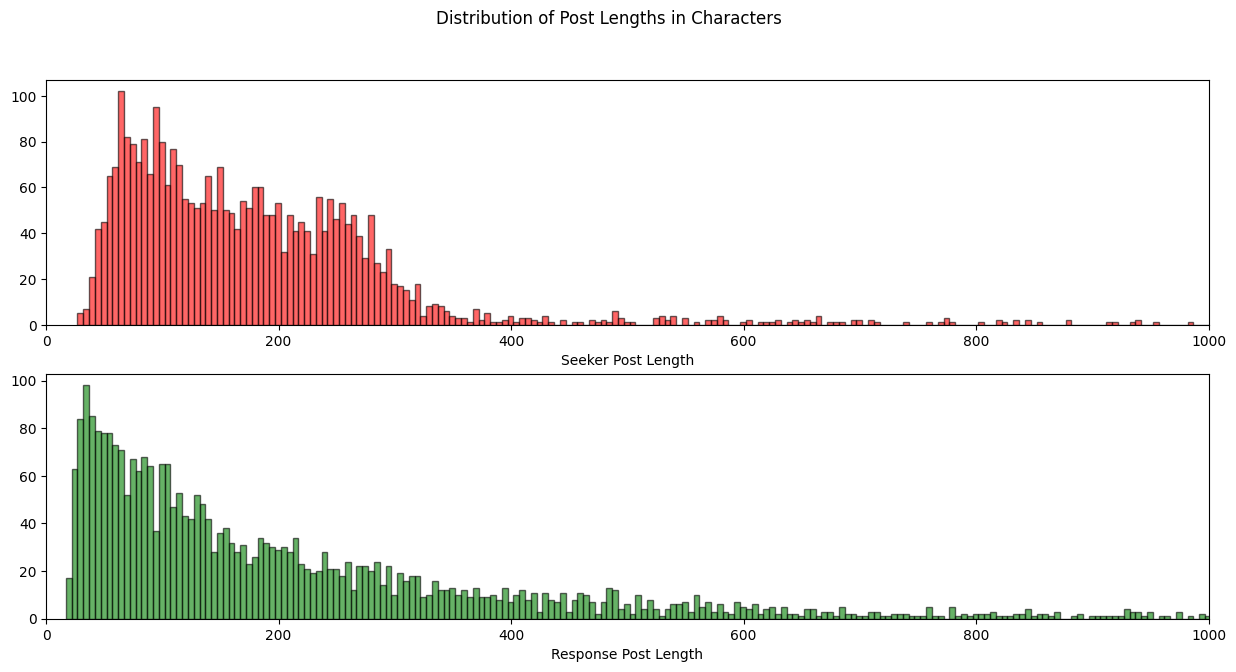

In [ ]:
fig, axs = plt.subplots(2, figsize=(15,7))
fig.suptitle('Distribution of Post Lengths in Characters')

binwidth = 5

seeker_length = em_df['seeker_length']
axs[0].hist(seeker_length, bins=range(min(seeker_length), max(seeker_length) + binwidth, binwidth), color='red', edgecolor='black', alpha=0.6)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel('Seeker Post Length')

response_length = em_df['response_length']
axs[1].hist(response_length, bins=range(min(response_length), max(response_length) + binwidth, binwidth), color='green', edgecolor='black', alpha=0.6)
axs[1].set_xlim(0,1000)
axs[1].set_xlabel('Response Post Length')

In [ ]:
em_df.groupby('level')['seeker_length', 'response_length'].describe()

<ipython-input-15-798d21536778>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  em_df.groupby('level')['seeker_length', 'response_length'].describe()


seeker_length                                                     \
              count        mean         std   min    25%    50%    75%   
level                                                                    
0            2037.0  181.584192   125.53868  27.0   95.0  157.0  236.0   
1             895.0  177.889385  139.361889  27.0   87.5  150.0  234.0   
2             152.0  184.947368  147.537841  36.0  92.25  152.5  238.5   

              response_length                                              \
          max           count        mean         std   min    25%    50%   
level                                                                       
0      1101.0          2037.0  223.623466  372.987882  17.0   64.0  129.0   
1      1070.0           895.0  293.068156  338.567457  19.0   85.0  190.0   
2      1017.0           152.0  249.782895  282.545007  20.0  86.25  152.0   

                       
          75%     max  
level                  
0       265.0  9191.0  
1       375.0  4272.0  
2      275.75  1938.0

In [ ]:
em_df[em_df['response_length'] < 600].groupby('level').describe()

seeker_length                                                      \
              count        mean         std   min    25%    50%     75%   
level                                                                     
0            1913.0  179.172504  121.337484  27.0   95.0  154.0   235.0   
1             790.0  168.231646  126.385767  27.0  82.25  141.0   217.0   
2             138.0  179.884058  135.814175  36.0   90.0  150.0  237.25   

              response_length              ... seeker_words         \
          max           count        mean  ...          75%    max   
level                                      ...                       
0      1080.0          1913.0  164.320439  ...        45.00  216.0   
1      1010.0           790.0  199.294937  ...        43.00  189.0   
2      1006.0           138.0  175.405797  ...        47.75  192.0   

      response_words                                                        
               count       mean        std  min    25%   50%    75%    max  
level                                                                       
0             1913.0  31.282802  25.350926  5.0  12.00  23.0  43.00  123.0  
1              790.0  38.617722  28.142507  5.0  15.00  31.0  57.00  123.0  
2              138.0  34.289855  24.891063  5.0  14.25  27.0  46.75  112.0  

[3 rows x 32 columns]

In [ ]:
em_df.groupby('level')[['seeker_words', 'response_words']].describe()

seeker_words                                                       \
             count       mean        std  min    25%   50%   75%    max   
level                                                                     
0           2037.0  34.635248  24.209040  6.0  18.00  30.0  45.0  216.0   
1            895.0  34.560894  26.739702  6.0  17.00  29.0  44.0  206.0   
2            152.0  36.513158  29.015864  8.0  18.75  30.0  48.0  202.0   

      response_words                                                         
               count       mean        std  min    25%   50%    75%     max  
level                                                                        
0             2037.0  42.423662  71.189692  5.0  12.00  25.0  50.00  1811.0  
1              895.0  56.237989  64.264121  5.0  17.00  36.0  72.00   817.0  
2              152.0  48.532895  53.944529  5.0  15.75  29.0  55.75   355.0

Text(0.5, 0, 'Number of Words in Response Post')

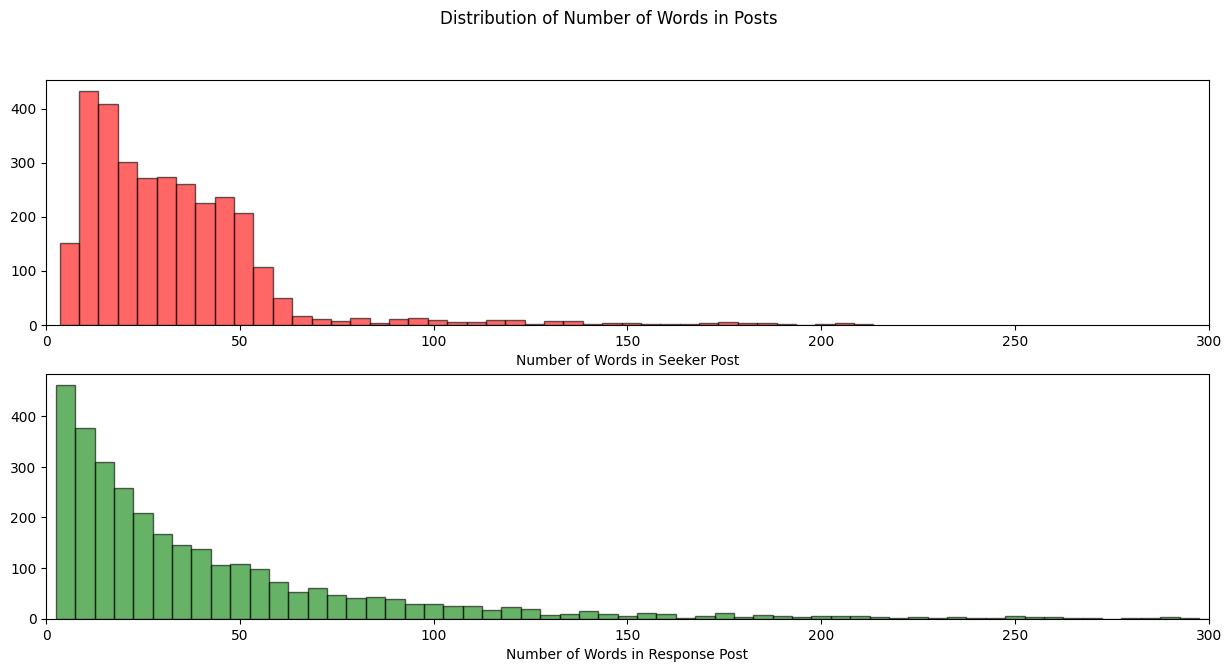

In [ ]:
fig, axs = plt.subplots(2, figsize=(15,7))
fig.suptitle('Distribution of Number of Words in Posts')

binwidth = 5

seeker_words = em_df['seeker_words']
axs[0].hist(seeker_words, bins=range(min(seeker_words), max(seeker_words) + binwidth, binwidth), color='red', edgecolor='black', alpha=0.6, align='left')
axs[0].set_xlim(0,300)
axs[0].set_xlabel('Number of Words in Seeker Post')

response_words = em_df['response_words']
axs[1].hist(response_words, bins=range(min(response_words), max(response_words) + binwidth, binwidth), color='green', edgecolor='black', alpha=0.6, align='left')
axs[1].set_xlim(0,300)
axs[1].set_xlabel('Number of Words in Response Post')

In [ ]:
em_df.describe()

,level,seeker_length,response_length,seeker_words,response_words
count,3084.000000,3084.0,3084.0,3084.000000,3084.000000
mean,0.388781,180.677691,245.066148,34.706226,46.733787
std,0.579925,130.803294,360.551713,25.214808,68.743159
min,0.000000,27.0,17.0,6.000000,5.000000
25%,0.000000,94.0,71.0,18.000000,14.000000
50%,0.000000,154.0,143.0,30.000000,28.000000
75%,1.000000,236.0,295.0,45.000000,56.000000
max,2.000000,1101.0,9191.0,216.000000,1811.000000


In [ ]:
em_df[em_df['response_words'] > 300].head()

,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
158,9lu4cj,e79jlgs,"I never asked to be alive, so why do I have to...",Youa re comdemned to a life of freedom. Is an ...,1,Stay strong friend Love|,179,4272,41,817,[4225],[23],[4],[4248]
223,6fb9i5,digzwe0,What's the point?. Why am I supposed to stay a...,It's a sad reality that everything comes to an...,1,if you do feel like talking about it more feel...,186,2014,39,398,[1857],[117],[24],[1974]
423,6vdc5g,dlzesc7,Laziness or lack of motivation.. How have some...,"Hi Talk2muchaa, Lik onus111 suggested, 'feelin...",0,<NA>,90,1700,14,310,<NA>,<NA>,<NA>,<NA>
554,3zlyhc,cyn6pwj,I want to die. That's all I have to say,Most of us on this have been/are there. I know...,0,<NA>,39,2207,10,427,<NA>,<NA>,<NA>,<NA>
984,9t0b89,e8txotz,Cyclothymia. I have just been diagnosed with c...,"I was diagnosed with it when I was 15, and I a...",1,Do all you can do to find the proper treatment...,290,1911,49,344,[1830],[69],[15],[1899]


Text(0.5, 1.0, 'Frequency of Rationale Start Locations in Emotional Response Data')

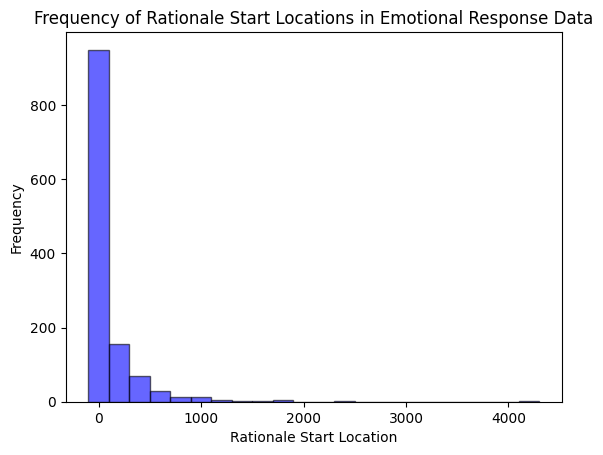

In [ ]:
binwidth = 200
rationale_start = (em_df_exploded[em_df_exploded['rationale_start'].notnull()]['rationale_start']).astype(int)
plt.hist(rationale_start, color='blue', edgecolor='black', bins=range(min(rationale_start), max(rationale_start) + binwidth, binwidth), alpha=0.6, align='left')
plt.xlabel('Rationale Start Location')
plt.ylabel('Frequency')
plt.title('Frequency of Rationale Start Locations in Emotional Response Data')

Text(0.5, 1.0, 'Frequency of Lengths of Rationales in Emotional Response Data')

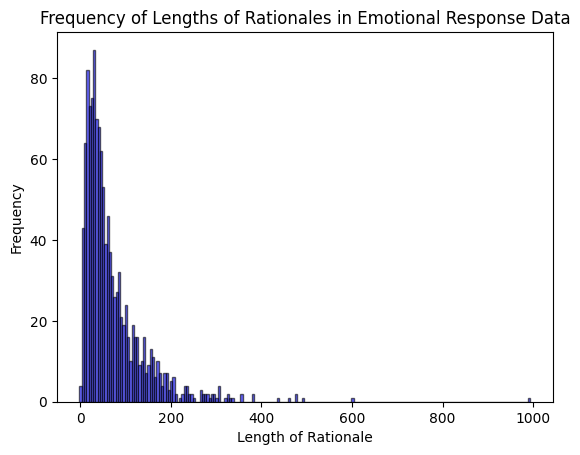

In [ ]:
binwidth = 5
rationale_length = (em_df_exploded[em_df_exploded['rationale_length'].notnull()]['rationale_length']).astype(int)
plt.hist(rationale_length, color='blue', edgecolor='black', bins=range(min(rationale_length), max(rationale_length) + binwidth, binwidth), alpha=0.6, align='left')
plt.xlabel('Length of Rationale')
plt.ylabel('Frequency')
plt.title('Frequency of Lengths of Rationales in Emotional Response Data')

Text(0.5, 1.0, 'Distribution of Number of Words in Rationales in Emotional Response Data')

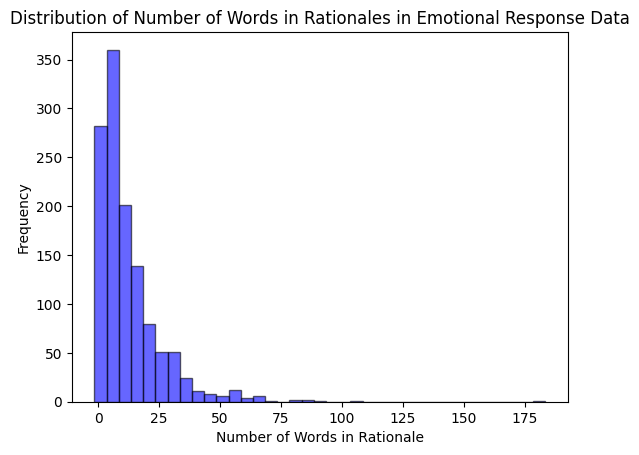

In [ ]:
binwidth = 5
rationale_words = (em_df_exploded[em_df_exploded['rationale_words'].notnull()]['rationale_words']).astype(int)
plt.hist(rationale_words, color='blue', edgecolor='black', bins=range(min(rationale_words), max(rationale_words) + binwidth, binwidth), alpha=0.6, align='left')
plt.xlabel('Number of Words in Rationale')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Words in Rationales in Emotional Response Data')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(em_df['response_post'], em_df['level'], test_size=0.2, random_state=42)

# Convert text data to a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       409
           1       0.54      0.62      0.58       177
           2       0.50      0.03      0.06        31

    accuracy                           0.72       617
   macro avg       0.62      0.49      0.48       617
weighted avg       0.72      0.72      0.71       617

Confusion Matrix:
[[335  74   0]
 [ 66 110   1]
 [  9  21   1]]


# Explorations EDA

In [ ]:
ex_df = get_df(ex_data_path)
ex_rows = ex_df.shape[0]
print(f'Shape of explorations data: {ex_df.shape}')
ex_df.head(10)

Shape of explorations data: (3084, 14)


,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",2,do you not know what you're doing in regards t...,45,122,9,23,[21],[101],[20],[122]
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,<NA>,120,392,27,80,<NA>,<NA>,<NA>,<NA>
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",0,<NA>,102,101,16,19,<NA>,<NA>,<NA>,<NA>
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,By any chance do you think you're in a loop|,181,288,32,57,[0],[43],[10],[43]
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,0,<NA>,584,577,114,108,<NA>,<NA>,<NA>,<NA>
5,5aliuq,d9hmspc,Not arsed with school. Can't study or do homew...,That's why I'm repeating 11th grade. It sucks.,0,<NA>,174,46,34,8,<NA>,<NA>,<NA>,<NA>
6,auo0t4,eh9cb6a,My parents wont allow me to sick medical assis...,Ask your school counselor what resources they ...,0,<NA>,132,133,25,24,<NA>,<NA>,<NA>,<NA>
7,7oi3es,ds9oti2,I called in sick to work today. For the first ...,Is that really so bad? Maybe it was the smart ...,1,Is that really so bad?|,249,196,52,36,[0],[22],[5],[22]
8,8r6onw,e0oz7y1,"Lost my job, have no reason to live. My career...",Why can't you get a job as a lawyer?,2,Why can't you get a job as a lawyer?|,285,36,52,9,[0],[36],[9],[36]
9,7gipvi,dqje246,i wanna jump from an elevated place. i wanna k...,I don't want you to jump. I don't want you to ...,0,<NA>,372,202,72,41,<NA>,<NA>,<NA>,<NA>


<Axes: >

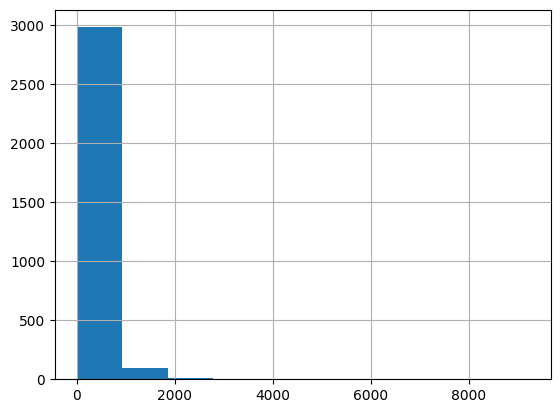

In [ ]:
ex_df['response_length'].hist()

Text(0.5, 0, 'Response Post Length')

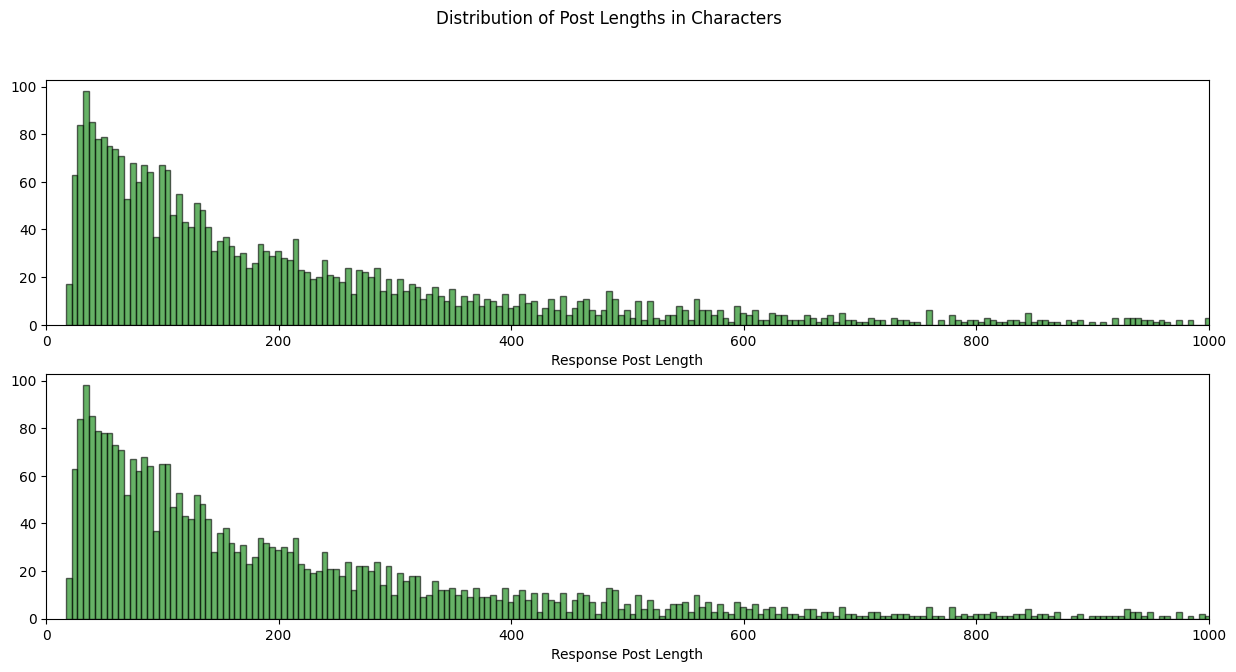

In [ ]:
fig, axs = plt.subplots(2, figsize=(15,7))
fig.suptitle('Distribution of Post Lengths in Characters')

binwidth = 5

response_length = ex_df['response_length']
axs[0].hist(response_length, bins=range(min(response_length), max(response_length) + binwidth, binwidth), color='green', edgecolor='black', alpha=0.6)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel('Response Post Length')

response_length = em_df['response_length']
axs[1].hist(response_length, bins=range(min(response_length), max(response_length) + binwidth, binwidth), color='green', edgecolor='black', alpha=0.6)
axs[1].set_xlim(0,1000)
axs[1].set_xlabel('Response Post Length')

<Axes: >

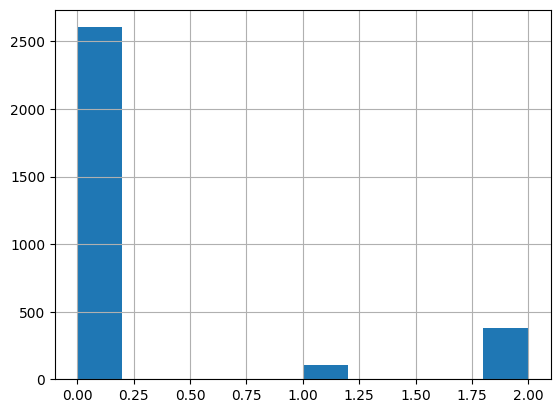

In [ ]:
ex_df['level'].hist()

In [ ]:
level_0_rationale = ex_df[(ex_df['level']==0) & (ex_df['rationales'].notnull())]
level_1_2_no_rationale = ex_df[(ex_df['level']!=0) & (ex_df['rationales'].isnull())]
print(f'There are {len(level_0_rationale)} rows with a level = 0 and a rationale.')
print(f'There are {len(level_1_2_no_rationale)} rows with a level = 1 or level = 2 and no rationale.')
level_1_2_no_rationale.head()

There are 0 rows with a level = 0 and a rationale.
There are 1 rows with a level = 1 or level = 2 and no rationale.


,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
387,8592pp,dvvtwrb,My emotion state is connected to one person.. ...,but why do you say it now,1,<NA>,76,25,15,7,<NA>,<NA>,<NA>,<NA>


# Interpretions EDA

In [ ]:
in_df = get_df(in_data_path)
in_rows = in_df.shape[0]
print(f'Shape of explorations data: {in_df.shape}')
in_df.head(10)

Shape of explorations data: (3084, 14)


,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
0,65m92s,dgbdk7z,Help. Help me. I dunno what I'm doing anymore,"That's pretty vague, do you not know what you'...",0,<NA>,45,122,9,23,<NA>,<NA>,<NA>,<NA>
1,9ezsfi,e5t3oxh,I'm done saying I love you to her because I do...,idk what a Red pill means exactly but my advic...,0,<NA>,120,392,27,80,<NA>,<NA>,<NA>,<NA>
2,6b2cmc,dhj8tcb,Always feel like I'm being criticized and mock...,"I think it's social anxiety , that creates par...",2,unless I'm wrong but that's how I feel|,102,101,16,19,[63],[38],[8],[101]
3,8iz0as,dyvq1ne,My diet becomes fucked when i get depressed.. ...,By any chance do you think you're in a loop. J...,2,For a while that was my problem too. Even if i...,181,288,32,57,[138],[150],[31],[288]
4,aow3l9,eg40ecq,I hate not knowing why. I was diagnosed with d...,depression. not sadness which is caused by som...,2,I take antidepressants and my depression is go...,584,577,114,108,[426],[151],[29],[577]
5,5aliuq,d9hmspc,Not arsed with school. Can't study or do homew...,That's why I'm repeating 11th grade. It sucks.,0,<NA>,174,46,34,8,<NA>,<NA>,<NA>,<NA>
6,auo0t4,eh9cb6a,My parents wont allow me to sick medical assis...,Ask your school counselor what resources they ...,0,<NA>,132,133,25,24,<NA>,<NA>,<NA>,<NA>
7,7oi3es,ds9oti2,I called in sick to work today. For the first ...,Is that really so bad? Maybe it was the smart ...,0,<NA>,249,196,52,36,<NA>,<NA>,<NA>,<NA>
8,8r6onw,e0oz7y1,"Lost my job, have no reason to live. My career...",Why can't you get a job as a lawyer?,0,<NA>,285,36,52,9,<NA>,<NA>,<NA>,<NA>
9,7gipvi,dqje246,i wanna jump from an elevated place. i wanna k...,I don't want you to jump. I don't want you to ...,0,<NA>,372,202,72,41,<NA>,<NA>,<NA>,<NA>


<Axes: >

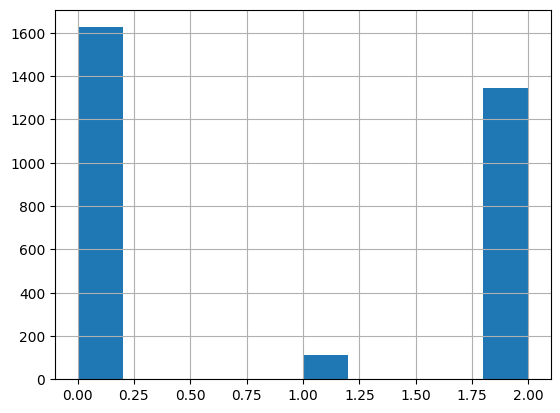

In [ ]:
in_df['level'].hist()

In [ ]:
level_0_rationale = in_df[(in_df['level']==0) & (in_df['rationales'].notnull())]
level_1_2_no_rationale = in_df[(in_df['level']!=0) & (in_df['rationales'].isnull())]
print(f'There are {len(level_0_rationale)} rows with a level = 0 and a rationale.')
print(f'There are {len(level_1_2_no_rationale)} rows with a level = 1 or level = 2 and no rationale.')
level_1_2_no_rationale.head()

There are 0 rows with a level = 0 and a rationale.
There are 8 rows with a level = 1 or level = 2 and no rationale.


,sp_id,rp_id,seeker_post,response_post,level,rationales,seeker_length,response_length,seeker_words,response_words,rationale_start,rationale_length,rationale_words,rationale_end
141,4l3izw,d3k0o33,I spent today either staring blankly at a comp...,That's an accurate description of the past 2 m...,2,<NA>,113,63,21,12,<NA>,<NA>,<NA>,<NA>
151,9bg2jo,e53ar2e,I swear if one more person tells me: You only ...,All it does is make me feel worse because just...,2,<NA>,248,59,49,12,<NA>,<NA>,<NA>,<NA>
183,5qb992,dcxxw33,Has anyone here had success with Mirtazapine (...,Haha. Same exact medications. No. It did nothi...,2,<NA>,121,72,16,12,<NA>,<NA>,<NA>,<NA>
293,ajhuga,eew57bl,Every day I think; this can't get any worse. A...,I'm the opposite of this. I just ask Can today...,2,<NA>,92,156,18,31,<NA>,<NA>,<NA>,<NA>
334,5dmcm1,da5pjve,I keep myself so busy and try so hard to make ...,I think I can only live if I keep myself happy...,2,<NA>,265,86,53,19,<NA>,<NA>,<NA>,<NA>


<BarContainer object of 10 artists>

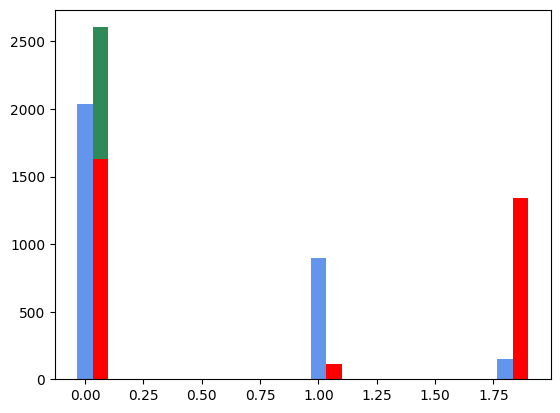

In [ ]:

import numpy as np
# import matplotlib.pyplot as plt
# import pandas
# #import seaborn
# #seaborn.set(style='ticks')

# np.random.seed(0)
# df = pandas.DataFrame(np.random.normal(size=(37,2)), columns=['A', 'B'])
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(em_df['level'])
b_heights, b_bins = np.histogram(ex_df['level'], bins=a_bins)
c_heights, c_bins = np.histogram(in_df['level'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
ax.bar(c_bins[:-1]+width, c_heights, width=width, facecolor='red')
#seaborn.despine(ax=ax, offset=10)

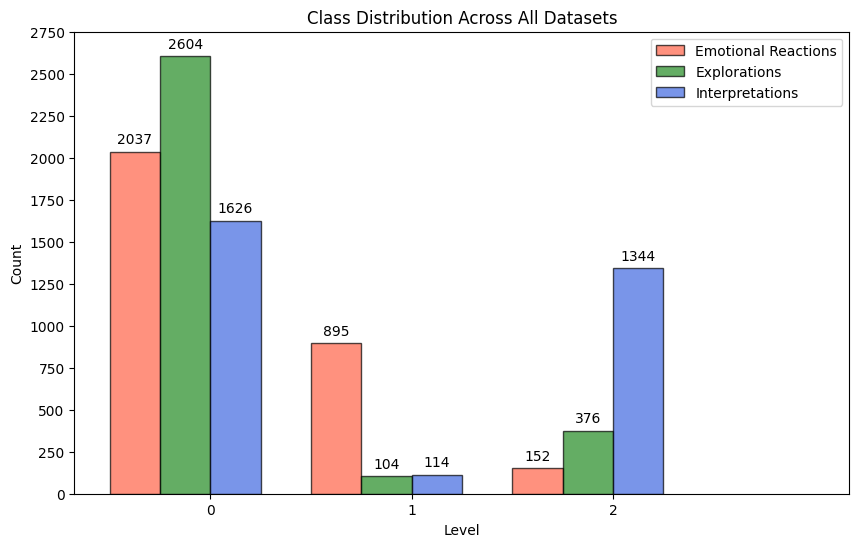

In [ ]:
plt.figure(figsize=(10, 6))

df1 = em_df['level']
df2 = ex_df['level']
df3 = in_df['level']
bar_width = 0.25
num_datasets = 3
# Plot histogram for each dataset
for i, (df, label, color) in enumerate(zip([df1, df2, df3], ['Emotional Reactions', 'Explorations', 'Interpretations'], ['tomato', 'forestgreen', 'royalblue'])):
    positions = np.arange(0, 3) + i * bar_width - (num_datasets - 1) * bar_width / 2
    plt.hist(df, bins=np.arange(-0.5, 3, 1)+i*bar_width, alpha=0.7, label=label, color=color, edgecolor='black', linewidth=1, width=bar_width)
    for pos, value in zip(positions, df.value_counts().sort_index()):
        plt.text(pos-bar_width/2, value + 30, str(value), ha='center', va='bottom', color='black')

# Customize plot
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks([0, 1, 2])
plt.yticks(np.arange(0, 2751, 250))
plt.legend()
# plt.grid(axis='y', alpha=0.7)
plt.title('Class Distribution Across All Datasets')

# Show plot
plt.show()

#GRAVEYARD
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [ ]:
combine_df = em_df.merge(ex_df, on=['sp_id', 'rp_id', 'seeker_post', 'response_post'], how='left', indicator=True)

In [ ]:
em_ex_df = combine_df[combine_df['_merge'] == 'left_only']

In [ ]:
em_post[em_post.index[0]]

NameError: ignored

In [ ]:
em_ex_df.index[-1]

In [ ]:
em_df.iloc[3180]

In [ ]:
cases = []
for index in em_ex_df.index:
    print(index)
    em_response = em_df.iloc[index]['response_post']
    ex_response = ex_df.iloc[index]['response_post']
    cases.append((em_response, ex_response))


# for a,b in cases:
#     print('{} => {}'.format(a,b))
#     for i,s in enumerate(difflib.ndiff(a, b)):
#         if s[0]==' ': continue
#         elif s[0]=='-':
#             print(u'Delete "{}" from position {}'.format(s[-1],i))
#         elif s[0]=='+':
#             print(u'Add "{}" to position {}'.format(s[-1],i))
#     print()

In [ ]:
em_df[(em_df['sp_id']=='7gqrti')]

In [ ]:
i = 0
sp = []

for index, row in em_df.iterrows():
    try:
        if -1 in row['rationale_start']:
            print(row)
            i += 1
            sp.append(row['sp_id'])
    except:
        pass

print(i)
em_df[em_df['sp_id'].isin(sp)]

In [ ]:
em_df[(em_df['sp_id']=='7gqrti')].merge(ex_df, on=['sp_id', 'rp_id', 'seeker_post'], how='inner')

,sp_id,rp_id,seeker_post,response_post_x,level_x,rationales_x,seeker_length,response_length,seeker_words,response_words,response_post_y,level_y,rationales_y
0,7gqrti,dqtsu52,"26 year old male, living at home, low income j...",Just fucking do it. what could go wrong. Make ...,1,Just fucking do it. what could go wrong. Make ...,188,272,35,50,Just fucking do it. what could go wrong. Make ...,0,NaN
1,7gqrti,dqz05c5,"26 year old male, living at home, low income j...","I see what you mean, but imagine being 26, liv...",0,NaN,188,446,35,88,"I see what you mean, but imagine being 26, liv...",0,NaN


In [ ]:
em_df['rationale_start'] = [[response.find(sent) if rationale != '' else None for response, rationale in zip(df['response_post'], df['rationales']) for sent in rationale.split('|')]]
# em_df['rationale_length'] = df['rationales'].str.len() - 1 # - 1 because it seems like rationales end with |
# em_df['rationale_words'] = df['rationales'].map(lambda x: len(str(x)[:-1].split()) if pd.notnull(x) else None)
# em_df['rationale_end'] = df['rationale_start'] + df['rationale_length']

ValueError: ignored

In [ ]:
em_post = em_df[(em_df['sp_id']=='4dydd1') & (em_df['rp_id']=='d1vi4c7')]['response_post']

In [ ]:
ex_post = ex_df[(ex_df['sp_id']=='4dydd1') & (ex_df['rp_id']=='d1vi4c7')]['response_post']

In [ ]:
em_post[em_post.index[0]]

"*hug* Whatever the situation is that's causing you to feel this way, please remember to exercise compassion towards yourself."

TypeError: ignored

In [ ]:
em_post[3078].strip() == ex_post[3078].strip()

False

In [ ]:
import difflib
output_list = [li for li in difflib.ndiff(em_post[3083], ex_post[3083]) if li[0] != ' ']

In [ ]:
output_list

['+  ']

In [ ]:
cases=[(em_post[3078], ex_post[3078])]

for a,b in cases:
    print('{} => {}'.format(a,b))
    for i,s in enumerate(difflib.ndiff(a, b)):
        if s[0]==' ': continue
        elif s[0]=='-':
            print(u'Delete "{}" from position {}'.format(s[-1],i))
        elif s[0]=='+':
            print(u'Add "{}" to position {}'.format(s[-1],i))
    print()

*hug* Whatever the situation is that's causing you to feel this way, please remember to exercise compassion towards yourself. => *hug*  Whatever the situation is that's causing you to feel this way, please remember to exercise compassion towards yourself.
Add " " to position 5



In [ ]:
em_post[3083][120:130]

"riend? I'm"

In [ ]:
ex_post[3083][120:130]

"riend?  I'"